# Import des librairies

In [117]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

# Fonctions

In [118]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Import du dataset

In [119]:
df_init = pd.read_csv('pokemon.csv',  index_col=1)
df = df_init.drop(labels = ["Number", "Egg_Group_1","Egg_Group_2","hasMegaEvolution","Pr_Male","hasGender"], axis = 1)

# Transforme la colonne "isLegendary" en valeur numérique

In [120]:
le = preprocessing.LabelEncoder()
df["isLegendary"] = le.fit_transform(df["isLegendary"])

# Affichage d'un échantillon de rows

In [121]:
df.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,Green,0.71,6.9,45,quadruped
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,Green,0.99,13.0,45,quadruped
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,Green,2.01,100.0,45,quadruped
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0,Red,0.61,8.5,45,bipedal_tailed
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0,Red,1.09,19.0,45,bipedal_tailed


# Affichage des infos du Dataframe

In [122]:
df.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.063800,1.144979,56.773370,100.246879
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.244566,1.044369,89.095667,76.573513
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000,0.610000,9.400000,45.000000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.000000,0.990000,28.000000,65.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.000000,1.400000,61.000000,180.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, Bulbasaur to Volcanion
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type_1       721 non-null    object 
 1   Type_2       350 non-null    object 
 2   Total        721 non-null    int64  
 3   HP           721 non-null    int64  
 4   Attack       721 non-null    int64  
 5   Defense      721 non-null    int64  
 6   Sp_Atk       721 non-null    int64  
 7   Sp_Def       721 non-null    int64  
 8   Speed        721 non-null    int64  
 9   Generation   721 non-null    int64  
 10  isLegendary  721 non-null    int64  
 11  Color        721 non-null    object 
 12  Height_m     721 non-null    float64
 13  Weight_kg    721 non-null    float64
 14  Catch_Rate   721 non-null    int64  
 15  Body_Style   721 non-null    object 
dtypes: float64(2), int64(10), object(4)
memory usage: 95.8+ KB


# Correlation

In [124]:
corr = df.corr()
corr

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Height_m,Weight_kg,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,0.526813,0.535966,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,0.442872,0.431320,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,0.408590,0.469395,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,0.354205,0.476983,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,0.330579,0.285048,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,0.313196,0.328645,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,0.224617,0.108637,-0.410557
Generation,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.051304,0.034003,-0.025227
isLegendary,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,0.326323,0.425219,-0.319302
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,-0.051304,0.326323,1.000000,0.661342,-0.382862


# Affichage du Heatmap

In [125]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'min-width': '100px', 'font-size': '13pt', "text-align": "center"})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Height_m,Weight_kg,Catch_Rate
Total,1.00,0.64,0.70,0.61,0.72,0.71,0.55,0.09,0.48,0.53,0.54,-0.74
HP,0.64,1.00,0.43,0.23,0.37,0.38,0.17,0.07,0.26,0.44,0.43,-0.48
Attack,0.70,0.43,1.00,0.43,0.34,0.21,0.34,0.09,0.30,0.41,0.47,-0.53
Defense,0.61,0.23,0.43,1.00,0.20,0.48,-0.01,0.07,0.27,0.35,0.48,-0.44
Sp_Atk,0.72,0.37,0.34,0.20,1.00,0.49,0.44,0.07,0.41,0.33,0.29,-0.54
Sp_Def,0.71,0.38,0.21,0.48,0.49,1.00,0.23,0.06,0.36,0.31,0.33,-0.51
Speed,0.55,0.17,0.34,-0.01,0.44,0.23,1.00,0.00,0.29,0.22,0.11,-0.41
Generation,0.09,0.07,0.09,0.07,0.07,0.06,0.00,1.00,0.07,-0.05,0.03,-0.03
isLegendary,0.48,0.26,0.30,0.27,0.41,0.36,0.29,0.07,1.00,0.33,0.43,-0.32
Height_m,0.53,0.44,0.41,0.35,0.33,0.31,0.22,-0.05,0.33,1.00,0.66,-0.38


Après notre analyse, on a remarqué que certaines colonnes n'avaient aucun intérêt.

In [126]:
df_legendary = df.drop(labels = ["Generation", "Type_1", "Type_2", "Color", "Body_Style"], axis = 1)

In [127]:
df_legendary.isna().sum()

Total          0
HP             0
Attack         0
Defense        0
Sp_Atk         0
Sp_Def         0
Speed          0
isLegendary    0
Height_m       0
Weight_kg      0
Catch_Rate     0
dtype: int64

In [128]:
corr_cleaned = df_legendary.corr()
corr_cleaned

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Height_m,Weight_kg,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.481837,0.526813,0.535966,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.258926,0.442872,0.431320,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.302786,0.408590,0.469395,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.274446,0.354205,0.476983,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.409739,0.330579,0.285048,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.360215,0.313196,0.328645,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.286082,0.224617,0.108637,-0.410557
isLegendary,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,1.000000,0.326323,0.425219,-0.319302
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,0.326323,1.000000,0.661342,-0.382862
Weight_kg,0.535966,0.431320,0.469395,0.476983,0.285048,0.328645,0.108637,0.425219,0.661342,1.000000,-0.367798


In [129]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr_cleaned.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'min-width': '100px', 'font-size': '13pt', "text-align": "center"})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Height_m,Weight_kg,Catch_Rate
Total,1.00,0.64,0.70,0.61,0.72,0.71,0.55,0.48,0.53,0.54,-0.74
HP,0.64,1.00,0.43,0.23,0.37,0.38,0.17,0.26,0.44,0.43,-0.48
Attack,0.70,0.43,1.00,0.43,0.34,0.21,0.34,0.30,0.41,0.47,-0.53
Defense,0.61,0.23,0.43,1.00,0.20,0.48,-0.01,0.27,0.35,0.48,-0.44
Sp_Atk,0.72,0.37,0.34,0.20,1.00,0.49,0.44,0.41,0.33,0.29,-0.54
Sp_Def,0.71,0.38,0.21,0.48,0.49,1.00,0.23,0.36,0.31,0.33,-0.51
Speed,0.55,0.17,0.34,-0.01,0.44,0.23,1.00,0.29,0.22,0.11,-0.41
isLegendary,0.48,0.26,0.30,0.27,0.41,0.36,0.29,1.00,0.33,0.43,-0.32
Height_m,0.53,0.44,0.41,0.35,0.33,0.31,0.22,0.33,1.00,0.66,-0.38
Weight_kg,0.54,0.43,0.47,0.48,0.29,0.33,0.11,0.43,0.66,1.00,-0.37


# K-Means

Nous cherchons à mettre en évidence les pokémon légendaires dans un cluster.

In [130]:
x_kmeans = df_legendary.drop(labels=['isLegendary'], axis=1)
y_kmeans = df_legendary['isLegendary']

In [131]:
x_kmeans

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate
Name,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,0.71,6.9,45
Ivysaur,405,60,62,63,80,80,60,0.99,13.0,45
Venusaur,525,80,82,83,100,100,80,2.01,100.0,45
Charmander,309,39,52,43,60,50,65,0.61,8.5,45
Charmeleon,405,58,64,58,80,65,80,1.09,19.0,45
...,...,...,...,...,...,...,...,...,...,...
Yveltal,680,126,131,95,131,98,99,5.79,203.0,45
Zygarde,600,108,100,121,81,95,95,5.00,305.0,3
Diancie,600,50,100,150,100,150,50,0.71,8.8,3


In [132]:
y_kmeans

Name
Bulbasaur     0
Ivysaur       0
Venusaur      0
Charmander    0
Charmeleon    0
             ..
Yveltal       1
Zygarde       1
Diancie       1
Hoopa         1
Volcanion     1
Name: isLegendary, Length: 721, dtype: int64

In [133]:
x_kmeans.shape, y_kmeans.shape

((721, 10), (721,))

In [134]:
pd.Series(y_kmeans).value_counts(normalize=True)
pd.value_counts(y_kmeans, normalize=True).round(2)*100

0    94.0
1     6.0
Name: isLegendary, dtype: float64

Dans un premier temps, nous avons choisi 2 clusters, un avec les légendaires et un sans les légendaires.

In [135]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(x_kmeans)

KMeans(n_clusters=2, random_state=42)

In [136]:
df_legendary_result1 = df_legendary.copy(deep=True)
df_legendary_result1['cl_km'] = km.labels_
df_legendary_result1['legend'] = y_kmeans
df_legendary_result1 = df_legendary_result1[df_legendary_result1['cl_km']==1]
df_legendary_result1 = df_legendary_result1[df_legendary_result1['legend'] == 0]
df_legendary_result1

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Height_m,Weight_kg,Catch_Rate,cl_km,legend
Name,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,0,0.71,6.9,45,1,0
Charmander,309,39,52,43,60,50,65,0,0.61,8.5,45,1,0
Squirtle,314,44,48,65,50,64,43,0,0.51,9.0,45,1,0
Caterpie,195,45,30,35,20,20,45,0,0.30,2.9,255,1,0
Metapod,205,50,20,55,25,25,30,0,0.71,9.9,120,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Goomy,300,45,50,35,55,75,40,0,0.30,2.8,45,1,0
Phantump,309,43,70,48,50,60,38,0,0.41,7.0,120,1,0
Pumpkaboo,335,49,66,70,44,55,51,0,0.41,5.0,120,1,0


Le model ici n'étant pas concluant, nous allons tenter de retirer toutes les stats uniques, et n'avoir que le total, vous voir si cela à une réelle influence sur le model. De plus, nous allons augmenter le nombre de cluster.

## Calcul du nombre optimal de cluster grâce à la méthode du coude

*** For n_clusters = 2, inertia is 11759198.694452198 ***

*** For n_clusters = 3, inertia is 8109483.077955106 ***

*** For n_clusters = 4, inertia is 6504588.938712146 ***

*** For n_clusters = 5, inertia is 5736938.274998825 ***

*** For n_clusters = 6, inertia is 5219119.150833596 ***

*** For n_clusters = 7, inertia is 4878692.564200278 ***

*** For n_clusters = 8, inertia is 4546192.219139235 ***

*** For n_clusters = 9, inertia is 4229692.418226102 ***

*** For n_clusters = 10, inertia is 3986387.906412065 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

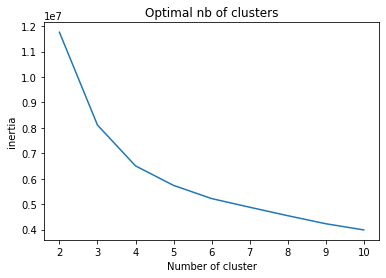

In [137]:
scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(x_kmeans)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

Ici, nous voyons que le nombre théorique optimal de cluster est de 4

Nous retirons les colonnes non numériques et que nous considérons avoir peu d'impact sur le type légendaire

In [138]:
df_withGender = df_init.drop(labels = ["Number", "Egg_Group_1","Egg_Group_2","hasMegaEvolution","Pr_Male", "Generation", "Type_1", "Type_2", "Color", "Body_Style"], axis = 1)
df_withGender

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,hasGender,Height_m,Weight_kg,Catch_Rate
Name,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,False,True,0.71,6.9,45
Ivysaur,405,60,62,63,80,80,60,False,True,0.99,13.0,45
Venusaur,525,80,82,83,100,100,80,False,True,2.01,100.0,45
Charmander,309,39,52,43,60,50,65,False,True,0.61,8.5,45
Charmeleon,405,58,64,58,80,65,80,False,True,1.09,19.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
Yveltal,680,126,131,95,131,98,99,True,False,5.79,203.0,45
Zygarde,600,108,100,121,81,95,95,True,False,5.00,305.0,3
Diancie,600,50,100,150,100,150,50,True,False,0.71,8.8,3


In [139]:
df_withGender["isLegendary"] = le.fit_transform(df_withGender["isLegendary"])
df_withGender["hasGender"] = le.fit_transform(df_withGender["hasGender"])

Nous retirons aussi le detail des stats des pokémon

In [140]:
df_withGender = df_withGender.drop(labels=['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg'], axis=1)
x_alt = df_withGender.drop(labels=['isLegendary'], axis=1)
y_alt = df_withGender['isLegendary']

In [141]:
x_alt

,Total,hasGender,Catch_Rate
Name,,,
Bulbasaur,318,1,45
Ivysaur,405,1,45
Venusaur,525,1,45
Charmander,309,1,45
Charmeleon,405,1,45
...,...,...,...
Yveltal,680,0,45
Zygarde,600,0,3
Diancie,600,0,3


In [142]:
y_alt

Name
Bulbasaur     0
Ivysaur       0
Venusaur      0
Charmander    0
Charmeleon    0
             ..
Yveltal       1
Zygarde       1
Diancie       1
Hoopa         1
Volcanion     1
Name: isLegendary, Length: 721, dtype: int64

In [143]:
pd.Series(y_alt).value_counts(normalize=True)
pd.value_counts(y_alt, normalize=True).round(2)*100

0    94.0
1     6.0
Name: isLegendary, dtype: float64

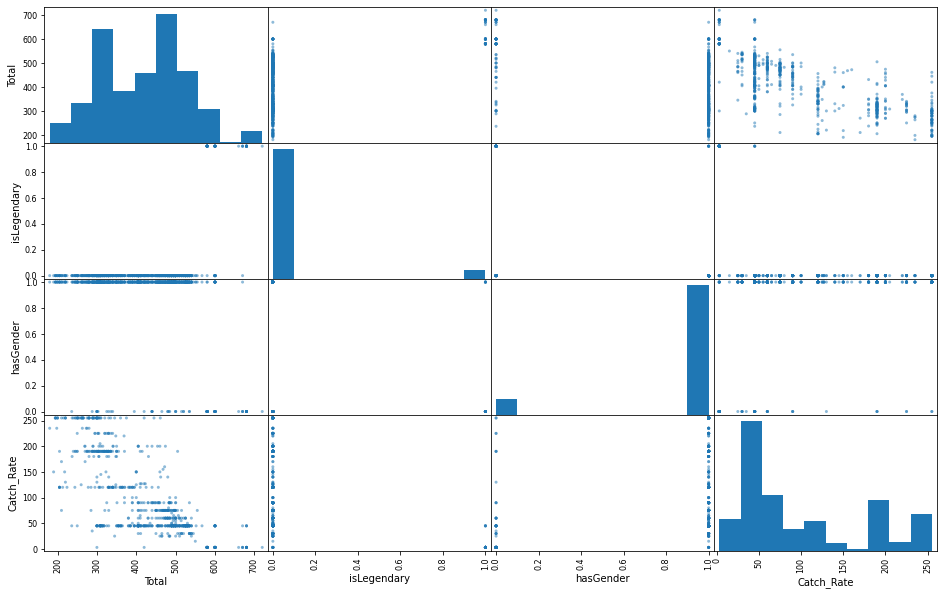

In [144]:
scatter_mat = scatter_matrix(df_withGender, figsize = (16,10))

In [145]:
# Voir les données qui sont à 1 dans cl_km
# Voir les données sont à < 45 dans Catch_Rate

In [146]:
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_minmax.fit(df_withGender)

KMeans(n_clusters=4, random_state=42)

In [147]:
kmeans_minmax.n_iter_ 
kmeans_minmax.labels_

array([3, 3, 0, 3, 3, 0, 3, 3, 0, 1, 1, 3, 1, 1, 3, 1, 3, 0, 1, 3, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 1,
       3, 0, 1, 3, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 0, 3, 1, 0, 1, 0, 1, 0, 3, 0, 1, 3, 0, 0, 3, 1, 0,
       3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3,
       3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 0,
       3, 3, 0, 3, 3, 0, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3,
       1, 0, 1, 3, 0, 0, 1, 3, 3, 0, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 0, 3,
       0, 0, 1, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 1,
       0, 3, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 0, 1, 3, 0, 1, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0,
       1, 0, 2, 1, 0, 3, 1, 3, 0, 1, 0, 1, 1, 1, 3,

In [148]:
len([i for i in kmeans_minmax.labels_ if i == 2])

63

In [149]:
df_withGender_result2 = df_withGender.copy(deep=True)
df_withGender_result2['cl_km'] = kmeans_minmax.labels_
df_withGender_result2['cl_km'] = df_withGender_result2['cl_km'].replace({0:0, 1:0, 2:1, 3:0})
df_withGender_result2['legend'] = y_alt
df_withGender_result2_1 = df_withGender_result2[df_withGender_result2['cl_km']==1]
df_withGender_result2_1 = df_withGender_result2_1[df_withGender_result2_1['legend'] == 0]
df_withGender_result2_1

,Total,isLegendary,hasGender,Catch_Rate,cl_km,legend
Name,,,,,,
Dragonite,600,0,1,45,1,0
Mew,600,0,0,45,1,0
Tyranitar,600,0,1,45,1,0
Celebi,600,0,0,45,1,0
Slaking,670,0,1,45,1,0
Salamence,600,0,1,45,1,0
Metagross,600,0,0,3,1,0
Garchomp,600,0,1,45,1,0
Cresselia,600,0,1,3,1,0


In [150]:
df_withGender_result2_2 = df_withGender_result2[df_withGender_result2['cl_km']==0]
df_withGender_result2_2 = df_withGender_result2_2[df_withGender_result2_2['legend'] == 1]
df_withGender_result2_2

,Total,isLegendary,hasGender,Catch_Rate,cl_km,legend
Name,,,,,,


Avec ce nouveau clustering, nous avons toujours des écarts bien réduit. Tous les légendaires ont bien été pris en compte. Ici les valeurs fausses sont des pokémon soit fabuleux (proche d'un légendaire) soit des pokémon non légendaires mais avec leurs caractéristiques (faible taux de capture, stats élevés, non genré), tel que Metagross qui n'est pas un légendaire.

---
# KNN

Nous allons comparer le résultat du KNN et du Kmeans en se basant sur le même dataframe df_withGender pour faire clustering des légendaires.

In [151]:
df_withGender

,Total,isLegendary,hasGender,Catch_Rate
Name,,,,
Bulbasaur,318,0,1,45
Ivysaur,405,0,1,45
Venusaur,525,0,1,45
Charmander,309,0,1,45
Charmeleon,405,0,1,45
...,...,...,...,...
Yveltal,680,1,0,45
Zygarde,600,1,0,3
Diancie,600,1,0,3


In [152]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [153]:
x_train = x_alt[:350]
x_test = x_alt[350:]
y_train = y_alt[:350]
y_test = y_alt[350:]

In [154]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [155]:
dist = pd.DataFrame(knn1.kneighbors()[0], columns=['dist'])
dist['neighbor']=knn1.kneighbors()[1]
dist

,dist,neighbor
0,0.0,151
1,0.0,155
2,0.0,196
3,0.0,154
4,0.0,155
...,...,...
345,0.0,140
346,0.0,137
347,0.0,140
348,0.0,128


In [156]:
y_pred = knn1.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [157]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [158]:
acc = knn1.score(x_test, y_test)
acc

0.9730458221024259

Le score de prédiction ici est de plus de 97,3%. Nous allons voir si nous pouvons l'améliorer

In [159]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[328,   6],
       [  4,  33]])

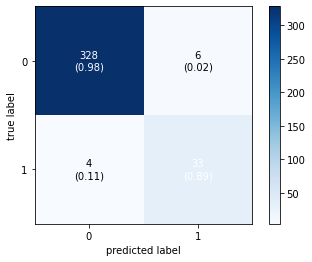

In [160]:
class_names = df_legendary.columns

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

In [161]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.9730458221024259

In [162]:
err = 1 - acc
err * 100

2.695417789757415

In [163]:
# Boucle à améliorer => k range de nb impair (pr les besoins du vote à majorité)
err_default = 2.7
neighbors = range(2, 101)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 2.695

Improvement of 0.0050000000000003375%




Results : knn = 3 => err_test = 1.887

Improvement of 0.8130000000000002%




Results : knn = 4 => err_test = 1.887

Improvement of 0.8130000000000002%




Results : knn = 5 => err_test = 1.887

Improvement of 0.8130000000000002%




Results : knn = 6 => err_test = 5.391

Improvement of -2.691%




Results : knn = 7 => err_test = 5.391

Improvement of -2.691%




Results : knn = 8 => err_test = 5.391

Improvement of -2.691%




Results : knn = 9 => err_test = 6.469

Improvement of -3.769%




Results : knn = 10 => err_test = 6.469

Improvement of -3.769%




Results : knn = 11 => err_test = 2.965

Improvement of -0.2649999999999997%




Results : knn = 12 => err_test = 6.469

Improvement of -3.769%




Results : knn = 13 => err_test = 6.469

Improvement of -3.769%




Results : knn = 14 => err_test = 6.469

Improvement of -3.769%




Results : knn = 15 => err_test = 6.469

Improvement of -3.769%




Resu

Avec cet algorithme, nous pouvons voir que la meilleurs optimisation est avec 3 voisins

In [164]:
knn2 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn2.fit(x_train, y_train)
knn2.kneighbors()[0]
dist = pd.DataFrame(knn2.kneighbors()[0][0], columns=['dist'])
dist['neighbor1']=knn2.kneighbors()[1][1]
dist['neighbor2']=knn2.kneighbors()[1][2]
dist['neighbor3']=knn2.kneighbors()[1][3]
y_pred2 = knn2.predict(x_test)
acc2 = knn2.score(x_test, y_test)
acc2

0.9811320754716981

Le taux de précidion est maintenant de 98,1% soit une amélioration de 0,8%. La prédiction est donc satisfaisante.

In [165]:
df_withGender_result_knn = df_withGender.copy(deep=True)[350:]
df_withGender_result_knn['cl_knn'] = y_pred2
df_withGender_result_knn['legend'] = y_alt
df_withGender_result_knn

,Total,isLegendary,hasGender,Catch_Rate,cl_knn,legend
Name,,,,,,
Castform,420,0,1,45,0,0
Kecleon,440,0,1,200,0,0
Shuppet,295,0,1,225,0,0
Banette,455,0,1,45,0,0
Duskull,295,0,1,190,0,0
...,...,...,...,...,...,...
Yveltal,680,1,0,45,1,1
Zygarde,600,1,0,3,1,1
Diancie,600,1,0,3,1,1


In [166]:
df_withGender_knn_result = df_withGender.copy(deep=True)
df_withGender_knn_result['cl_knn'] = kmeans_minmax.labels_
df_withGender_knn_result['cl_knn'] = df_withGender_knn_result['cl_knn'].replace({0:0, 1:0, 2:1, 3:0})
df_withGender_knn_result['legend'] = y_alt
df_withGender_knn_result_1 = df_withGender_knn_result[df_withGender_knn_result['cl_knn']==1]
df_withGender_knn_result_1 = df_withGender_knn_result_1[df_withGender_knn_result_1['legend'] == 0]
df_withGender_knn_result_1

,Total,isLegendary,hasGender,Catch_Rate,cl_knn,legend
Name,,,,,,
Dragonite,600,0,1,45,1,0
Mew,600,0,0,45,1,0
Tyranitar,600,0,1,45,1,0
Celebi,600,0,0,45,1,0
Slaking,670,0,1,45,1,0
Salamence,600,0,1,45,1,0
Metagross,600,0,0,3,1,0
Garchomp,600,0,1,45,1,0
Cresselia,600,0,1,3,1,0


In [167]:
df_withGender_knn_result_2 = df_withGender_knn_result[df_withGender_knn_result['cl_knn']==0]
df_withGender_knn_result_2 = df_withGender_knn_result_2[df_withGender_knn_result_2['legend'] == 1]
df_withGender_knn_result_2

,Total,isLegendary,hasGender,Catch_Rate,cl_knn,legend
Name,,,,,,


Avec la méthode du knn, nous nous retrouvons avec le même résultat et les même pokémon sont mal prédit. La raison est la même (pokémon trop proches des légendaire).

# Rondom Forest

Nous faisons la même analyse avec cette nouvelle méthode

In [168]:
# x_alt, y_alt
y = y_alt.values

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_alt, y, test_size=0.2, stratify=y, random_state=42)

In [170]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [171]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [172]:
y_pred_ft = rf.predict(x_test)
y_pred_ft

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [173]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_ft)
conf_mat

array([[134,   2],
       [  1,   8]])

In [175]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_ft)
conf_mat
pd.DataFrame(conf_mat, columns=["notLegendary","Legendary"], index=["notLegendary","Legendary"])

,notLegendary,Legendary
notLegendary,134,2
Legendary,1,8


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff1a23f9990>)

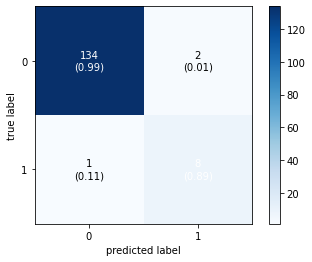

In [176]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

In [191]:
metrics.accuracy_score(y_test, y_pred_ft)

0.9793103448275862

## Optimisation

In [179]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [180]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [181]:
err_default = 9.99
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(x_train, y_train)
   err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 6 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 11 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 16 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 21 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 26 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 31 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 36 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 41 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 46 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 51 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 56 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 61 => err_test = 2.069


Improvement of 7.92%.


Results : n_estimators = 66 => err_tes

Text(0, 0.5, 'err_test')

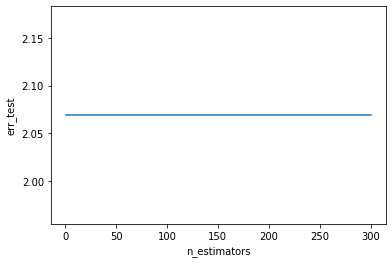

In [182]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [183]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(x_train, y_train)
    y_pred_1 = rf.predict(x_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred_1)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(x_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 1 => acc_oob = 94.965, err_test = 2.069, err_train = 0.694




Results : n_estimators = 6 => acc_oob = 98.09, err_test = 2.069, err_train = 0.694




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 11 => acc_oob = 98.785, err_test = 2.069, err_train = 0.694




Results : n_estimators = 16 => acc_oob = 98.785, err_test = 2.069, err_train = 0.694




Results : n_estimators = 21 => acc_oob = 98.611, err_test = 2.069, err_train = 0.694




Results : n_estimators = 26 => acc_oob = 99.132, err_test = 2.069, err_train = 0.694




Results : n_estimators = 31 => acc_oob = 99.132, err_test = 2.069, err_train = 0.694




Results : n_estimators = 36 => acc_oob = 98.785, err_test = 2.069, err_train = 0.694




Results : n_estimators = 41 => acc_oob = 99.132, err_test = 2.069, err_train = 0.694




Results : n_estimators = 46 => acc_oob = 99.132, err_test = 2.069, err_train = 0.694




Results : n_estimators = 51 => acc_oob = 99.306, err_test = 2.069, err_train = 0.694




Results : n_estimators = 56 => acc_oob = 99.132, err_test = 2.069, err_train = 0.694




Results : n_estimators = 61 => acc_oob = 98.958, err_test = 2.069, err_train = 0.694




Results : n_estimat

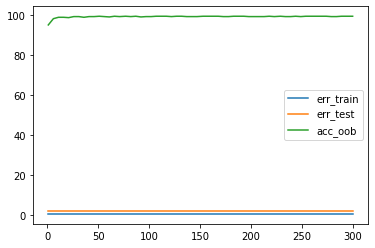

In [184]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [185]:
1-rf.oob_score_

0.00694444444444442

In [186]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 2 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 3 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 4 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 5 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 6 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 7 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 8 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 9 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = 10 => err_test = 2.069

Improvement of 7.921%




Results : max_depth = None => err_test = 2.069

Improvement of 7.921%




Text(0.5, 0, 'max_depths')

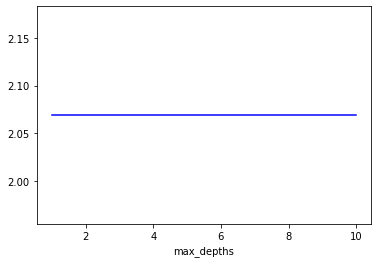

In [187]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

D'après ces graphs, nous ne pouvons pas améliorer la prédiction

Nous allons lancer la prédiction sur l'ensemble du dataset pourmieux comparer avec les autres méthode

In [192]:
y_pred_ft_all = rf.predict(x_alt)
metrics.accuracy_score(y_alt, y_pred_ft_all)

0.9902912621359223

Sur le dataset complet, la précision est de 99,0%. C'est donc pour l'instant la méthode la plus précise que nous avons vu

In [193]:
df_withGender_rf_result = x_alt.copy(deep=True)
df_withGender_rf_result['cl_rf'] = y_pred_ft_all
df_withGender_rf_result['legend'] = y_alt
df_withGender_rf_result_1 = df_withGender_rf_result[df_withGender_rf_result['cl_rf']==1]
df_withGender_rf_result_1 = df_withGender_rf_result_1[df_withGender_rf_result_1['legend'] == 0]
df_withGender_rf_result_1

,Total,hasGender,Catch_Rate,cl_rf,legend
Name,,,,,
Metagross,600,0,3,1,0
Cresselia,600,1,3,1,0
Manaphy,600,0,3,1,0
Keldeo,580,0,3,1,0
Meloetta,600,0,3,1,0
Genesect,600,0,3,1,0


In [194]:
df_withGender_rf_result_2 = df_withGender_rf_result[df_withGender_rf_result['cl_rf']==0]
df_withGender_rf_result_2 = df_withGender_rf_result_2[df_withGender_rf_result_2['legend'] == 1]
df_withGender_rf_result_2

,Total,hasGender,Catch_Rate,cl_rf,legend
Name,,,,,
Shaymin,600,0,45,0,1


In [195]:
len(y_pred)

371

Il y a 7 résultats faux, dont un légendaire qui n'a pas été identifié. Pour les pokèmon non légendaires faussement identifié, la raison reste la même que pour les autres méthodes (K-Means et KNN), mais est plus performante.
Pour le pokémon légendaire faussement identifié, c'est un nouveau cas. Il a toutes les caractéristiques d'un légendaire mais il est tout de même passer dans les mailles du filet.

# Decision tree 

Nous repronons le même dataset et la même problématique pour l'arbre de décision

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x_alt, 
                                                    y_alt, 
                                                    stratify=y, 
                                                    random_state=42)

In [198]:
tree = DecisionTreeClassifier(random_state=42)

In [199]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [200]:
y_pred = tree.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [201]:
y_test.values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0])

In [202]:
mat_conf = confusion_matrix(y_test, y_pred)
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.9834254143646409

In [203]:
acc = accuracy_score(y_test, y_pred)
acc

0.9834254143646409

La précision de ces prédiction est la plus élevée. Il est donc dure de trouver un arbre plus précis.

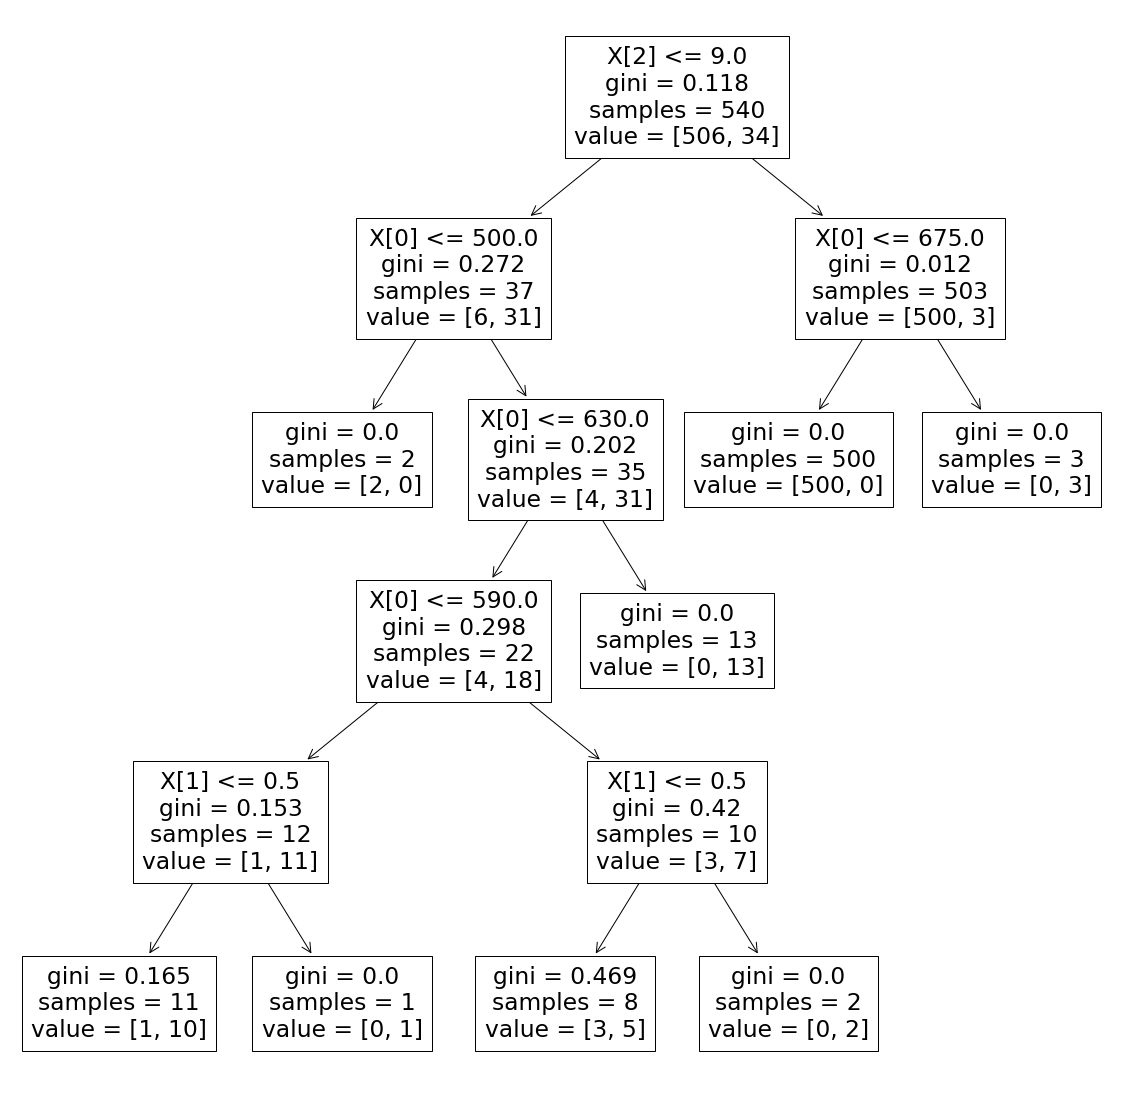

In [204]:
plt.figure(figsize = (20, 20))
tree_pokemon = plot_tree(tree)

In [205]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(x_train, y_train)
    score=tree.score(x_test, y_test)
    scores.append(score)
scores

[0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409,
 0.9834254143646409]

Avec ce résultat des scores, nous pouvons voir que nous ne pouvons pas faire d'optimisation sur l'arbre de décision

In [208]:
y_pred = tree.predict(x_alt)
metrics.accuracy_score(y_alt, y_pred)

0.9902912621359223

Sur le dataset complet, cette méthode est aussi précise que le Random Forest

In [209]:
df_withGender_dt_result = x_alt.copy(deep=True)
df_withGender_dt_result['cl_dt'] = y_pred
df_withGender_dt_result['legend'] = y_alt
df_withGender_dt_result_1 = df_withGender_dt_result[df_withGender_dt_result['cl_dt']==1]
df_withGender_dt_result_1 = df_withGender_dt_result_1[df_withGender_dt_result_1['legend'] == 0]
df_withGender_dt_result_1

,Total,hasGender,Catch_Rate,cl_dt,legend
Name,,,,,
Metagross,600,0,3,1,0
Cresselia,600,1,3,1,0
Manaphy,600,0,3,1,0
Keldeo,580,0,3,1,0
Meloetta,600,0,3,1,0
Genesect,600,0,3,1,0


In [207]:
df_withGender_dt_result_2 = df_withGender_dt_result[df_withGender_dt_result['cl_dt']==0]
df_withGender_dt_result_2 = df_withGender_dt_result_2[df_withGender_dt_result_2['legend'] == 1]
df_withGender_dt_result_2

,Total,hasGender,Catch_Rate,cl_dt,legend
Name,,,,,
Shaymin,600,0,45,0,1


Pour ces prédictions avec l'arbre de décision, nous avons le même résultat que la méthode Random Forest avec les même faille.

# Conclusion

Toutes les méthodes ont données des résultats cohérents avec un taux de précision sur le dataset complet variant de 98,1% à 99,0%.
Avec ce dataset sur les pokémon, nous distingons une ressemblance entre le K-means et le KNN ainsi qu'entre le Random Forest et l'arbre de décision. Dans le premier cas, la précision est la plus faible (98,1%) mais tous les pokémon légendaires ont été détecté. Dans le deuxième cas, la précision est la plus élevée (99,0%). Cependant, ces deux méthodes n'arrivent pas à prédire tous les légendaires.
Si l'on souhaite avoir une prédiction avec le moins de faux non légendaire, alors les deux premières méthodes (K-Means et KNN) sont plus adaptées. Si l'on souhaite avoir un taux d'erreur total plus faible, alors les deux dernières méthodes (Random Forest et arbre de décision) sont les plus adaptées. 